In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
iris = pd.read_csv("iris.csv")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


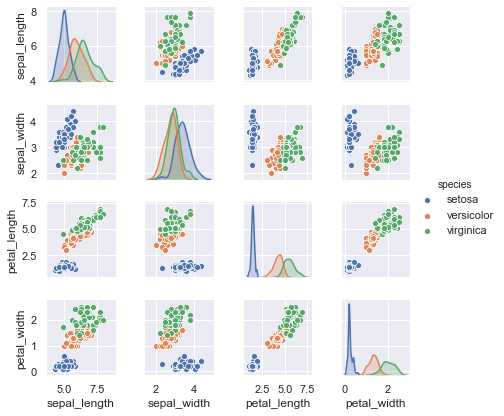

In [4]:
%matplotlib inline
sns.set()
sns.pairplot(iris, hue='species', size=1.5)

In [5]:
X_iris = iris.drop('species', axis=1) 
X_iris.shape

(150, 4)

In [6]:
y_iris = iris['species'] 
y_iris.shape

(150,)

In [7]:
import matplotlib.pyplot as plt 
import numpy as np

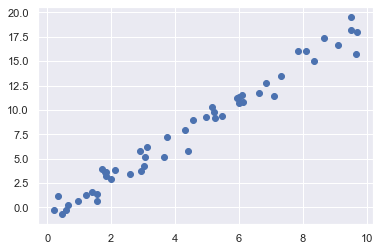

In [8]:
rng = np.random.RandomState(42) 
x = 10 * rng.rand(50) 
y = 2 * x - 1 + rng.randn(50) 
plt.scatter(x, y)

In [9]:
from sklearn.linear_model import LinearRegression

In [10]:
model = LinearRegression(fit_intercept=True)
model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [11]:
X = x[:, np.newaxis]
X.shape

(50, 1)

In [12]:
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [13]:
model.coef_ #斜率

array([1.9776566])

In [14]:
model.intercept_ #截距

-0.9033107255311164

In [15]:
xfit = np.linspace(-1, 11)

In [16]:
Xfit = xfit[:, np.newaxis] 
yfit = model.predict(Xfit)

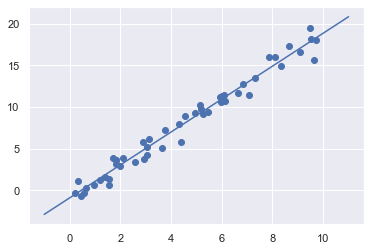

In [17]:
plt.scatter(x, y) 
plt.plot(xfit, yfit)

In [18]:
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X_iris, y_iris, random_state=1)

In [19]:
from sklearn.naive_bayes import GaussianNB # 1.选择模型类

model = GaussianNB() # 2.初始化模型 
model.fit(Xtrain, ytrain) # 3.用模型拟合数据 
y_model = model.predict(Xtest) # 4.对新数据进行预测

In [20]:
from sklearn.metrics import accuracy_score 
accuracy_score(ytest, y_model)

0.9736842105263158

In [21]:
from sklearn.decomposition import PCA # 1.选择模型类 
model = PCA(n_components=2) # 2.设置超参数，初始化模型 
model.fit(X_iris) # 3.拟合数据，注意这里不用y变量 
X_2D = model.transform(X_iris) # 4. 将数据转换为二维

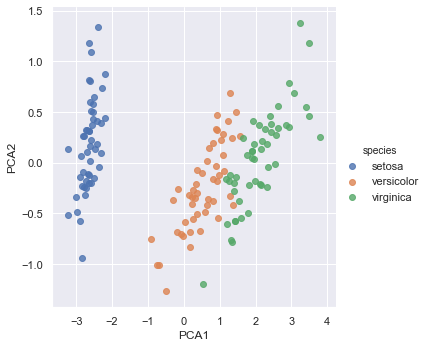

In [22]:
iris['PCA1'] = X_2D[:, 0]
iris['PCA2'] = X_2D[:, 1]
sns.lmplot("PCA1", "PCA2", hue='species', data=iris, fit_reg=False)

In [23]:
from sklearn.mixture import GaussianMixture # 1.选择模型类
model = GaussianMixture(n_components=3, 
                        covariance_type='full') # 2.设置超参数，初始化模型
model.fit(X_iris) # 3.拟合数据，注意不需要y变量
y_gmm = model.predict(X_iris) # 4. 确定簇标签

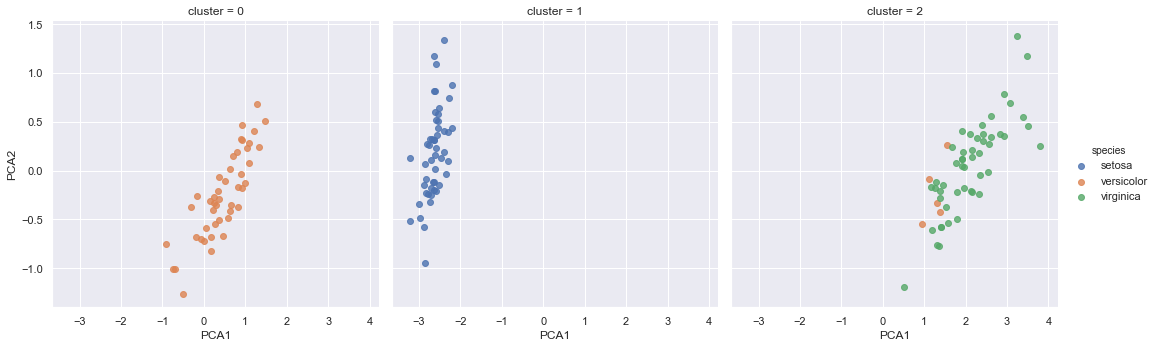

In [24]:
iris['cluster'] = y_gmm 
sns.lmplot("PCA1", "PCA2", data=iris, 
           hue='species', col='cluster', fit_reg=False);

In [25]:
from sklearn.datasets import load_digits 
digits = load_digits() 
digits.images.shape

(1797, 8, 8)

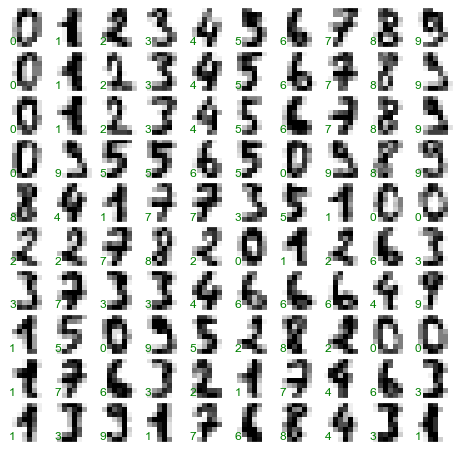

In [26]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(10, 10, figsize=(8, 8),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(digits.target[i]), transform=ax.transAxes, color='green')

In [27]:
X = digits.data 
X.shape

(1797, 64)

In [28]:
y = digits.target 
y.shape

(1797,)

In [29]:
from sklearn.manifold import Isomap

iso = Isomap(n_components=2) 
iso.fit(digits.data) 
data_projected = iso.transform(digits.data)
data_projected.shape

(1797, 2)

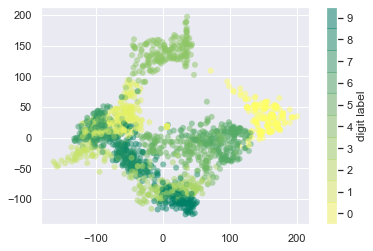

In [31]:
plt.scatter(data_projected[:, 0], data_projected[:, 1], c=digits.target,
            edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('summer_r', 10))
plt.colorbar(label='digit label', ticks=range(10)) 
plt.clim(-0.5, 9.5)

In [32]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=0)

In [33]:
from sklearn.naive_bayes import GaussianNB 
model = GaussianNB() 
model.fit(Xtrain, ytrain) 
y_model = model.predict(Xtest)

In [34]:
from sklearn.metrics import accuracy_score 
accuracy_score(ytest, y_model)

0.8333333333333334

Text(77.10000000000001, 0.5, 'true value')

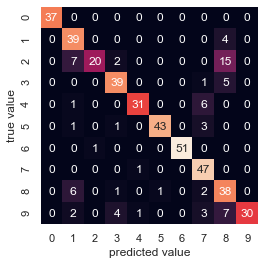

In [37]:
from sklearn.metrics import confusion_matrix

mat = confusion_matrix(ytest, y_model) 
ax = sns.heatmap(mat, square=True, annot=True, cbar=False) 
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.xlabel('predicted value') 
plt.ylabel('true value')

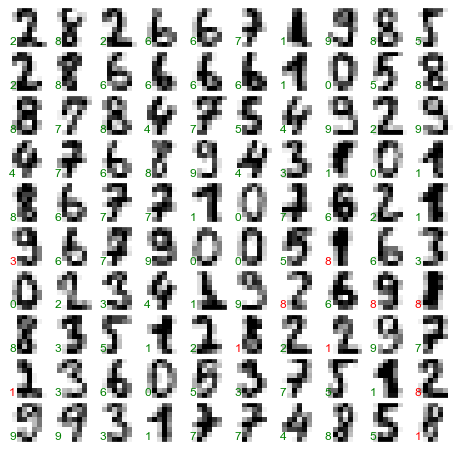

In [39]:
fig, axes = plt.subplots(10, 10, figsize=(8, 8),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1)) 

test_images=Xtest.reshape(-1,8,8) 
for i, ax in enumerate(axes.flat):
    ax.imshow(test_images[i], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(y_model[i]), transform=ax.transAxes, 
            color='green' if (ytest[i] == y_model[i]) else 'red')

In [42]:
from sklearn.datasets import load_iris 
iris = load_iris() 
X = iris.data 
y = iris.target

In [43]:
# 每个数据集分一半数据 
X1, X2, y1, y2 = train_test_split(X, y, random_state=0, train_size=0.5)

# 用模型拟合训练数据 
model.fit(X1, y1)

# 在测试集中评估模型准确率 
y2_model = model.predict(X2) 
accuracy_score(y2, y2_model)

0.9466666666666667

In [45]:
y2_model = model.fit(X1, y1).predict(X2)
y1_model = model.fit(X2, y2).predict(X1) 
accuracy_score(y1, y1_model), accuracy_score(y2, y2_model)

(0.9733333333333334, 0.9466666666666667)

In [46]:
from sklearn.model_selection import cross_val_score
cross_val_score(model, X, y, cv=5)

array([0.93333333, 0.96666667, 0.93333333, 0.93333333, 1.        ])

In [50]:
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.linear_model import LinearRegression 
from sklearn.pipeline import make_pipeline

def PolynomialRegression(degree=2, **kwargs):
    return make_pipeline(PolynomialFeatures(degree), LinearRegression(**kwargs))

In [51]:
def make_data(N, err=1.0, rseed=1):
    # 随机轴样数据 
    rng = np.random.RandomState(rseed) 
    X = rng.rand(N, 1) ** 2 
    y = 10 - 1. / (X.ravel() + 0.1) 
    if err > 0:
        y += err * rng.randn(N) 
    return X, y

X, y = make_data(40)

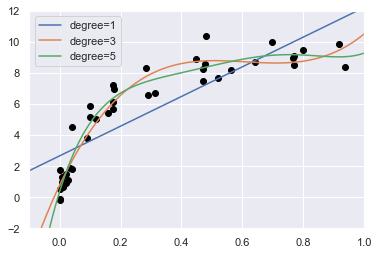

In [52]:
%matplotlib inline
import matplotlib.pyplot as plt 
import seaborn
seaborn.set()
# 设置图形样式
X_test = np.linspace(-0.1, 1.1, 500)[:, None]
plt.scatter(X.ravel(), y, color='black') 
axis = plt.axis() 
for degree in [1, 3, 5]:
    y_test = PolynomialRegression(degree).fit(X, y).predict(X_test)
    plt.plot(X_test.ravel(), y_test, label='degree={0}'.format(degree)) 
plt.xlim(-0.1, 1.0) 
plt.ylim(-2, 12) 
plt.legend(loc='best')

Text(0, 0.5, 'score')

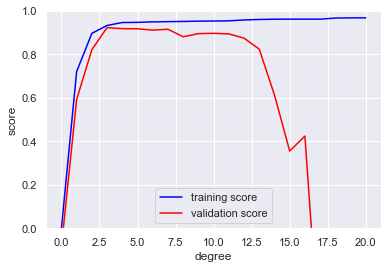

In [53]:
from sklearn.model_selection import validation_curve
degree = np.arange(0, 21) 
train_score, val_score = validation_curve(PolynomialRegression(), X, y, 
                                          'polynomialfeatures__degree', degree, cv=7)

plt.plot(degree, np.median(train_score, 1), color='blue', label='training score') 
plt.plot(degree, np.median(val_score, 1), color='red', label='validation score') 
plt.legend(loc='best') 
plt.ylim(0, 1) 
plt.xlabel('degree') 
plt.ylabel('score')

(-0.05673314103942452,
 0.994263633135634,
 -0.7459943120970807,
 10.918045992764213)

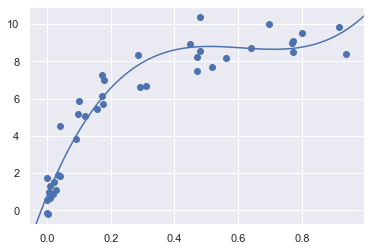

In [54]:
plt.scatter(X.ravel(), y)
lim = plt.axis() 
y_test = PolynomialRegression(3).fit(X, y).predict(X_test) 
plt.plot(X_test.ravel(), y_test)
plt.axis(lim)

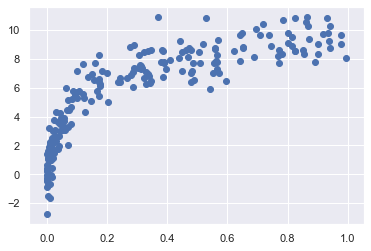

In [55]:
X2, y2 = make_data(200) 
plt.scatter(X2.ravel(), y2)

Text(0, 0.5, 'score')

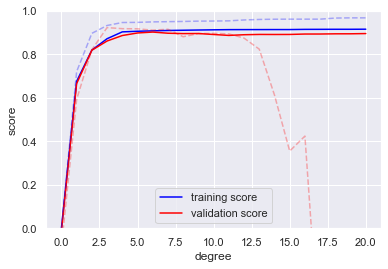

In [56]:
degree = np.arange(21) 
train_score2, val_score2 = validation_curve(PolynomialRegression(), X2, y2, 
                                            'polynomialfeatures__degree', degree, cv=7)

plt.plot(degree, np.median(train_score2, 1), color='blue', label='training score') 
plt.plot(degree, np.median(val_score2, 1), color='red', label='validation score') 
plt.plot(degree, np.median(train_score, 1), color='blue', alpha=0.3, linestyle='dashed') 
plt.plot(degree, np.median(val_score, 1), color='red', alpha=0.3,linestyle='dashed') 
plt.legend(loc='lower center') 
plt.ylim(0, 1) 
plt.xlabel('degree') 
plt.ylabel('score')

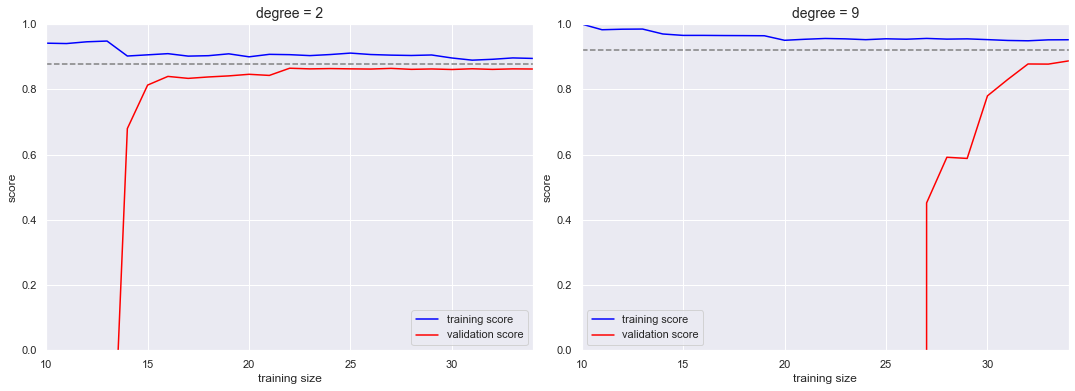

In [60]:
from sklearn.model_selection import learning_curve
fig, ax = plt.subplots(1, 2, figsize=(16, 6)) 
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)
for i, degree in enumerate([2, 9]):
    N, train_lc, val_lc = learning_curve(PolynomialRegression(degree),
                                         X, y, cv=7,train_sizes=np.linspace(0.3, 1, 25))
    ax[i].plot(N, np.mean(train_lc, 1), color='blue', label='training score') 
    ax[i].plot(N, np.mean(val_lc, 1), color='red', label='validation score')
    ax[i].hlines(np.mean([train_lc[-1], val_lc[-1]]), N[0], N[-1], color='gray',linestyle='dashed')
    ax[i].set_ylim(0, 1) 
    ax[i].set_xlim(N[0], N[-1]) 
    ax[i].set_xlabel('training size') 
    ax[i].set_ylabel('score') 
    ax[i].set_title('degree = {0}'.format(degree), size=14) 
    ax[i].legend(loc='best')

In [61]:
from sklearn.model_selection import GridSearchCV
param_grid = {'polynomialfeatures__degree': np.arange(21),
              'linearregression__fit_intercept': [True, False], 
              'linearregression__normalize': [True, False]}
grid = GridSearchCV(PolynomialRegression(), param_grid, cv=7)

In [62]:
grid.fit(X, y)

GridSearchCV(cv=7, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('polynomialfeatures',
                                        PolynomialFeatures(degree=2,
                                                           include_bias=True,
                                                           interaction_only=False,
                                                           order='C')),
                                       ('linearregression',
                                        LinearRegression(copy_X=True,
                                                         fit_intercept=True,
                                                         n_jobs=None,
                                                         normalize=False))],
                                verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'linearregression__fit_intercept': [True, False],
                        

In [63]:
grid.best_params_

{'linearregression__fit_intercept': False,
 'linearregression__normalize': True,
 'polynomialfeatures__degree': 4}

(-0.05673314103942452,
 0.994263633135634,
 -0.7459943120970807,
 10.918045992764213)

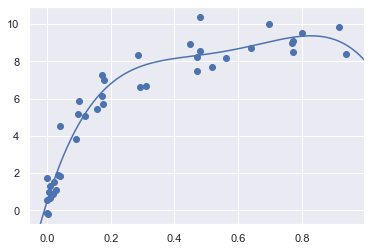

In [65]:
model = grid.best_estimator_

plt.scatter(X.ravel(), y) 
lim = plt.axis() 
y_test = model.fit(X, y).predict(X_test) 
plt.plot(X_test.ravel(), y_test)
plt.axis(lim)

In [66]:
data = [{'price': 850000, 'rooms': 4, 'neighborhood': 'Queen Anne'}, 
        {'price': 700000, 'rooms': 3, 'neighborhood': 'Fremont'}, 
        {'price': 650000, 'rooms': 3, 'neighborhood': 'Wallingford'}, 
        {'price': 600000, 'rooms': 2, 'neighborhood': 'Fremont'} ]

In [67]:
{'Queen Anne': 1, 'Fremont': 2, 'Wallingford': 3}

{'Queen Anne': 1, 'Fremont': 2, 'Wallingford': 3}

In [68]:
from sklearn.feature_extraction import DictVectorizer
vec = DictVectorizer(sparse=False, dtype=int) 
vec.fit_transform(data)

array([[     0,      1,      0, 850000,      4],
       [     1,      0,      0, 700000,      3],
       [     0,      0,      1, 650000,      3],
       [     1,      0,      0, 600000,      2]])

In [69]:
vec.get_feature_names()

['neighborhood=Fremont',
 'neighborhood=Queen Anne',
 'neighborhood=Wallingford',
 'price',
 'rooms']

In [70]:
vec = DictVectorizer(sparse=True, dtype=int) 
vec.fit_transform(data)

<4x5 sparse matrix of type '<class 'numpy.int64'>'
	with 12 stored elements in Compressed Sparse Row format>

In [71]:
sample = ['problem of evil', 'evil queen', 'horizon problem']

In [72]:
from sklearn.feature_extraction.text import CountVectorizer

vec = CountVectorizer() 
X = vec.fit_transform(sample) 
X

<3x5 sparse matrix of type '<class 'numpy.int64'>'
	with 7 stored elements in Compressed Sparse Row format>

In [73]:
pd.DataFrame(X.toarray(), columns=vec.get_feature_names())

,evil,horizon,of,problem,queen
0,1,0,1,1,0
1,1,0,0,0,1
2,0,1,0,1,0


In [74]:
from sklearn.feature_extraction.text import TfidfVectorizer 
vec = TfidfVectorizer() 
X = vec.fit_transform(sample) 
pd.DataFrame(X.toarray(), columns=vec.get_feature_names())

,evil,horizon,of,problem,queen
0,0.517856,0.000000,0.680919,0.517856,0.000000
1,0.605349,0.000000,0.000000,0.000000,0.795961
2,0.000000,0.795961,0.000000,0.605349,0.000000


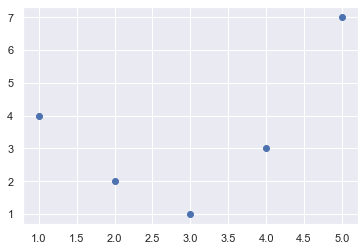

In [75]:
x = np.array([1, 2, 3, 4, 5]) 
y = np.array([4, 2, 1, 3, 7]) 
plt.scatter(x, y)

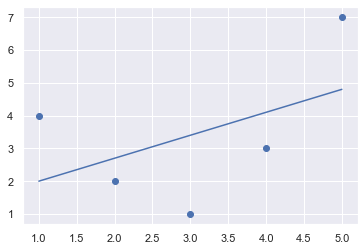

In [76]:
from sklearn.linear_model import LinearRegression

X = x[:, np.newaxis]
model = LinearRegression().fit(X, y)
yfit = model.predict(X) 
plt.scatter(x, y) 
plt.plot(x, yfit)

In [77]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=3, include_bias=False) 
X2 = poly.fit_transform(X) 
print(X2)

[[  1.   1.   1.]
 [  2.   4.   8.]
 [  3.   9.  27.]
 [  4.  16.  64.]
 [  5.  25. 125.]]


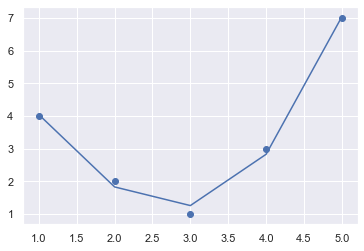

In [78]:
model = LinearRegression().fit(X2, y) 
yfit = model.predict(X2) 
plt.scatter(x, y) 
plt.plot(x, yfit)

In [79]:
from numpy import nan

X = np.array([[ nan, 0, 3 ], 
              [ 3, 7, 9 ], 
              [ 3, 5, 2 ], 
              [ 4, nan, 6 ], 
              [ 8, 8, 1 ]])

y = np.array([14, 16, -1, 8, -5])

In [80]:
from sklearn.preprocessing import Imputer 
imp = Imputer(strategy='mean') 
X2 = imp.fit_transform(X) 
X2

array([[4.5, 0. , 3. ],
       [3. , 7. , 9. ],
       [3. , 5. , 2. ],
       [4. , 5. , 6. ],
       [8. , 8. , 1. ]])

In [81]:
from sklearn.pipeline import make_pipeline

model = make_pipeline(Imputer(strategy='mean'),
                      PolynomialFeatures(degree=2), 
                      LinearRegression())

In [82]:
model.fit(X, y) # 和上面一样，X带有缺失值 
print(y) 
print(model.predict(X))

[14 16 -1  8 -5]
[14. 16. -1.  8. -5.]
